# This notebook is a simple illustration for a regression model using "NSL-KDD" data set

* I have not explored the data thioroughly as it is already done on 
https://www.kaggle.com/code/timgoodfellow/nsl-kdd-explorations
* I have used RandomForestClassifier algorithm to follow the predictions but the model predictions can be enhanced by other algorithms by experimentations.
* This model shows some potentials of overfitting but we will do it next time with other algorithms.

In [47]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the datasets(Training and testing)
df_train=pd.read_csv("data/nsl-kdd/KDDTrain+.txt",low_memory=False)
df_test=pd.read_csv("data/nsl-kdd/KDDTest+.txt",low_memory=False)

In [3]:
df_train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


### The data has nameless columns so I am renaming them using the link:

https://www.kaggle.com/code/timgoodfellow/nsl-kdd-explorations

In [4]:
# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])
df_train.columns=columns
df_test.columns=columns
df_train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'level'],
      dtype='object')

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  int8   
 2   service                      125972 non-null  int8   
 3   flag                         125972 non-null  int8   
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [6]:
# Checking for null values
df_train.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

### Now converting the strings,objects to numerical data

* First we will see which labels are not numerical ones
* Then I will convert those labesl to categorial data
* After that I will convert those categories to numerical data

In [7]:
# See the labels which are not numerical
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [8]:
# Creating a copy of datasets
train_df= df_train.copy()
test_df=df_test.copy()

In [9]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [10]:
# There are 4 columns of object type so converting them to categories

#For train data set
for label, content in train_df.items():
    if pd.api.types.is_object_dtype(content):
        train_df[label] = content.astype("category").cat.as_ordered()

#For test dataset
for label, content in test_df.items():
    if pd.api.types.is_object_dtype(content):
        test_df[label] = content.astype("category").cat.as_ordered()


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   duration                     125972 non-null  int64   
 1   protocol_type                125972 non-null  category
 2   service                      125972 non-null  category
 3   flag                         125972 non-null  category
 4   src_bytes                    125972 non-null  int64   
 5   dst_bytes                    125972 non-null  int64   
 6   land                         125972 non-null  int64   
 7   wrong_fragment               125972 non-null  int64   
 8   urgent                       125972 non-null  int64   
 9   hot                          125972 non-null  int64   
 10  num_failed_logins            125972 non-null  int64   
 11  logged_in                    125972 non-null  int64   
 12  num_compromised              125972 non-null

In [12]:
train_df.attack.cat.codes

0         11
1          9
2         11
3         11
4          9
          ..
125967     9
125968    11
125969    11
125970     9
125971    11
Length: 125972, dtype: int8

In [13]:
# check for training data columns having categorial data
for label, content in train_df.items():
    if pd.api.types.is_categorical_dtype(content):
        print(label)

protocol_type
service
flag
attack


In [14]:
# check for testing data columns having categorial data
for label, content in test_df.items():
    if pd.api.types.is_categorical_dtype(content):
        print(label)

protocol_type
service
flag
attack


In [17]:
# convert train categories into numbers
for label, content in train_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add +1 to avoid -1 in numerics
        train_df[label] = pd.Categorical(content).codes + 1

In [18]:
# convert test categories into numbers
for label, content in test_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add +1 to avoid -1 in numerics
        test_df[label] = pd.Categorical(content).codes + 1

In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  int8   
 2   service                      22543 non-null  int8   
 3   flag                         22543 non-null  int8   
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

### Now saving this data in new files to work on

In [23]:
# Exporting the training data
train_df.to_csv("data/nsl-kdd/KDDTrain+.txt", index=False)
#importing back
train_df=pd.read_csv("data/nsl-kdd/KDDTrain+.txt",low_memory=False)
train_df.head().T

,0,1,2,3,4
duration,0.00,0.00,0.00,0.00,0.00
protocol_type,3.00,2.00,2.00,2.00,2.00
service,45.00,50.00,25.00,25.00,50.00
flag,10.00,6.00,10.00,10.00,2.00
src_bytes,146.00,0.00,232.00,199.00,0.00
dst_bytes,0.00,0.00,8153.00,420.00,0.00
land,0.00,0.00,0.00,0.00,0.00
wrong_fragment,0.00,0.00,0.00,0.00,0.00
urgent,0.00,0.00,0.00,0.00,0.00
hot,0.00,0.00,0.00,0.00,0.00


In [24]:
# Exporting the testing data
test_df.to_csv("data/nsl-kdd/KDDTest+.txt", index=False)
#importing back 
test_df=pd.read_csv("data/nsl-kdd/KDDTest+.txt",low_memory=False)
test_df.head().T

,0,1,2,3,4
duration,0.00,2.00,0.00,1.00,0.00
protocol_type,2.00,2.00,1.00,2.00,2.00
service,46.00,20.00,14.00,56.00,23.00
flag,2.00,10.00,10.00,3.00,10.00
src_bytes,0.00,12983.00,20.00,0.00,267.00
dst_bytes,0.00,0.00,0.00,15.00,14515.00
land,0.00,0.00,0.00,0.00,0.00
wrong_fragment,0.00,0.00,0.00,0.00,0.00
urgent,0.00,0.00,0.00,0.00,0.00
hot,0.00,0.00,0.00,0.00,0.00


### Modelling

In [26]:
%%time
from sklearn.ensemble import RandomForestRegressor

# Instantiate model
model=RandomForestRegressor(n_jobs=-1, random_state=42)
# Fit model X and y of the training set df_tmp
model.fit(train_df.drop("attack",axis=1),train_df["attack"])

CPU times: total: 2min 1s
Wall time: 8.46 s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [27]:
model.score(train_df.drop("attack",axis=1),train_df["attack"])

0.9987715797066102

### Now i will split the train data set to train and validation dataset

So I have X_train_new, X_val, y_train_new, y_val for training and validation

In [29]:
from sklearn.model_selection import train_test_split

#Splitting the dataset
X_train = train_df.drop('attack', axis=1)  
y_train = train_df['attack']

# Splitting the data into training and validation sets ( 80% train, 20% validation)
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)




In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_new, y_train_new)

# Validate the model
y_val_pred = model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = val_mse ** 0.5

print(f"Validation RMSE: {val_rmse}")


Validation RMSE: 0.2148057162875748


## Lets try fitting the model on different ML models

For that i am creating a function to minimize our fitting task.

In [34]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def train_models(X_train, y_train, X_val, y_val):
    # Dictionary to store models and their performance
    models = {
        'RandomForest': RandomForestRegressor(random_state=42),
        'KNeighbors': KNeighborsRegressor(),
        'GradientBoosting': GradientBoostingRegressor(random_state=42)
    }
    
    results = {}
    
    # Train each model and evaluate on validation set
    for model_name, model in models.items():
        print(f"Training {model_name}...")
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on the validation set
        y_val_pred = model.predict(X_val)
        
        # Calculate RMSE (Root Mean Squared Error)
        val_mse = mean_squared_error(y_val, y_val_pred)
        val_rmse = val_mse ** 0.5
        
        # Store the results
        results[model_name] = {
            'model': model,
            'validation_rmse': val_rmse
        }
        
        print(f"{model_name} Validation RMSE: {val_rmse}")
    
    return results


In [35]:
train_models(X_train, y_train, X_val, y_val)

Training RandomForest...
RandomForest Validation RMSE: 0.08105390660766365
Training KNeighbors...
KNeighbors Validation RMSE: 0.4117504104142278
Training GradientBoosting...
GradientBoosting Validation RMSE: 0.6736048611568084


{'RandomForest': {'model': RandomForestRegressor(random_state=42),
  'validation_rmse': 0.08105390660766365},
 'KNeighbors': {'model': KNeighborsRegressor(),
  'validation_rmse': 0.4117504104142278},
 'GradientBoosting': {'model': GradientBoostingRegressor(random_state=42),
  'validation_rmse': 0.6736048611568084}}

### Since the Random forest algorithm has the lowest validation score we will now try to make it even more better by hyperparameter tuning

I will do it with RandomizedSearchCV

In [37]:
%%time
from sklearn.model_selection import RandomizedSearchCV
# Different RandomForestRegressor hyoerparameters
rf_grid={"n_estimators":np.arange(10,100,10), "max_depth":[None,3,5,10],"min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2),"max_features":[0.5,1,"sqrt","log2"]}
#instantiate RandomizedSCV model
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),param_distributions=rf_grid,n_iter=200,cv=5,verbose=True)
#fit RSCV model
rs_model.fit(X_train,y_train)
# Get the best parameters after the search
print("Best Hyperparameters found: ", rs_model.best_params_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Hyperparameters found:  {'n_estimators': 90, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': None}
CPU times: total: 1h 18min 17s
Wall time: 8min 50s


## So I got the best Parameters for hyper tuning as:

* Best Hyperparameters found:
* {'n_estimators': 90,
* 'min_samples_split': 14,
* 'min_samples_leaf': 1,
* 'max_features': 0.5,
*  'max_depth': None}

  #### Lets train our model on the best parameters we got

In [40]:
%%time
# Best RandomForestRegressor hyperparameters
best_model=RandomForestRegressor(n_estimators=90,min_samples_split=14,min_samples_leaf= 1,max_features= 0.5,
                                   max_depth=None,random_state=42)
#fit RSCV model
best_model.fit(X_train,y_train)

CPU times: total: 20.8 s
Wall time: 20.9 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=90,
                      random_state=42)

In [41]:
# Make predictions on training and validation sets
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)

# Calculate RMSE for training set
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Calculate RMSE for validation set
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

# Print RMSE for both train and validation sets
print(f"Training RMSE: {train_rmse}")
print(f"Validation RMSE: {val_rmse}")


Training RMSE: 0.1438135194259058
Validation RMSE: 0.13102227041536277


## Rmse is increased 

So it may has following reasons:
* Overfitting: If your model was previously overfitting the training data, 
the new parameters might be less flexible, leading to worse performance on both training and validation sets.

#### Lets experiment more and see if our rmse declines or not

In [42]:

# New hyperparameter grid
rf_grid_expanded = {
    "n_estimators": np.arange(50, 200, 10),  # Wider range of n_estimators
    "max_depth": [None, 5, 10, 15, 20],  # Include more depth options
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 10, 1),  # Reduced range
    "max_features": [0.3, 0.5, 0.7, "sqrt", "log2"],  # Additional feature options
}

# Run RandomizedSearchCV again
rs_model_expanded = RandomizedSearchCV(
    RandomForestRegressor(n_jobs=-1, random_state=42),
    param_distributions=rf_grid_expanded,
    n_iter=200,
    cv=5,
    verbose=True,
    n_jobs=-1
)

# Fit the model with the expanded hyperparameter grid
rs_model_expanded.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters after expansion:", rs_model_expanded.best_params_)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Hyperparameters after expansion: {'n_estimators': 170, 'min_samples_split': 12, 'min_samples_leaf': 1, 'max_features': 0.7, 'max_depth': None}


In [44]:

from sklearn.metrics import mean_squared_error
import numpy as np

# Fit the best model from RandomizedSearchCV
best_model_expanded = rs_model_expanded.best_estimator_
best_model_expanded.fit(X_train, y_train)

# Predict on training set
y_train_pred_expanded = best_model_expanded.predict(X_train)
train_rmse_expanded = np.sqrt(mean_squared_error(y_train, y_train_pred_expanded))

# Predict on validation set
y_val_pred_expanded = best_model_expanded.predict(X_val)
val_rmse_expanded = np.sqrt(mean_squared_error(y_val, y_val_pred_expanded))

# Print RMSE for both train and validation sets
print(f"Training RMSE after hyperparameter tuning: {train_rmse_expanded}")
print(f"Validation RMSE after hyperparameter tuning: {val_rmse_expanded}")


Training RMSE after hyperparameter tuning: 0.13247517749455912
Validation RMSE after hyperparameter tuning: 0.12097204191962928


### Plotting for some visulaisations

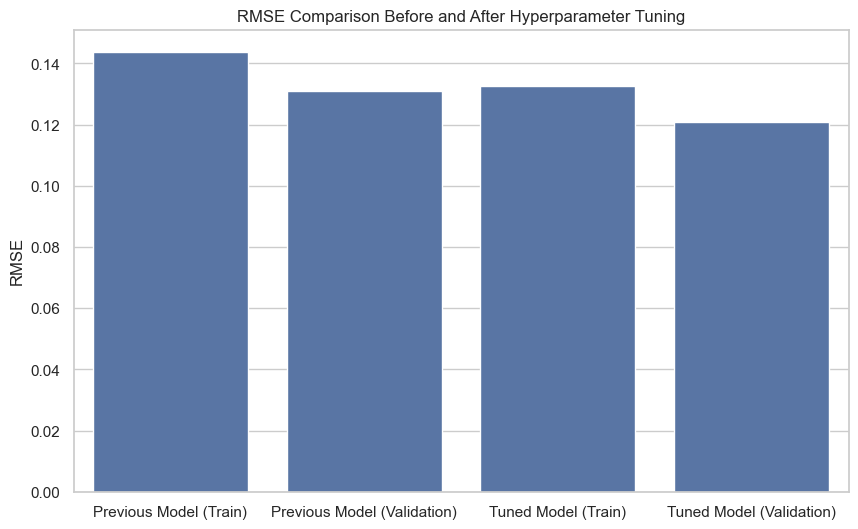

In [49]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# 1. RMSE Comparison Plot
# Assuming previous model RMSE values are stored in variables
previous_train_rmse = 0.1438  # Replace with your previous value
previous_val_rmse = 0.1310  # Replace with your previous value

rmse_labels = ['Previous Model (Train)', 'Previous Model (Validation)', 'Tuned Model (Train)', 'Tuned Model (Validation)']
rmse_values = [previous_train_rmse, previous_val_rmse, train_rmse_expanded, val_rmse_expanded]

plt.figure(figsize=(10, 6))
sns.barplot(x=rmse_labels, y=rmse_values)
plt.title('RMSE Comparison Before and After Hyperparameter Tuning')
plt.ylabel('RMSE')
plt.show()


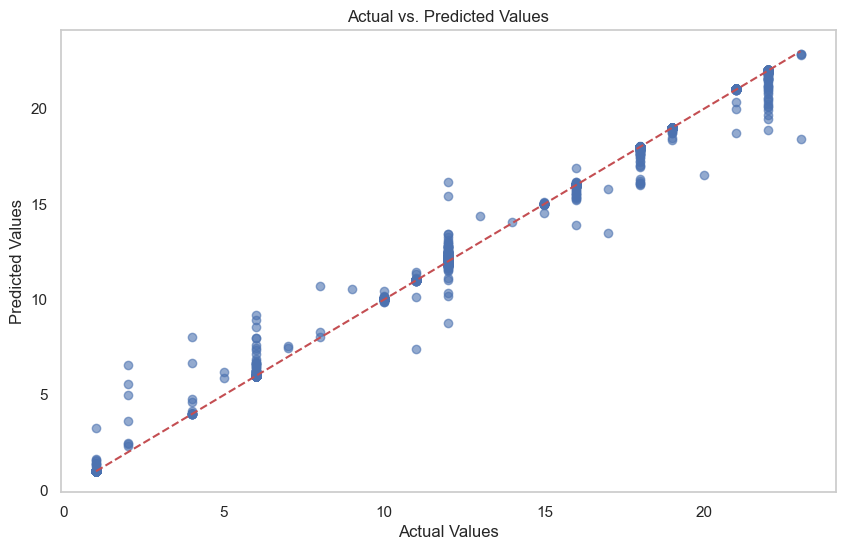

In [50]:
# 2. Actual vs. Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred_expanded, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')  # Diagonal line
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()

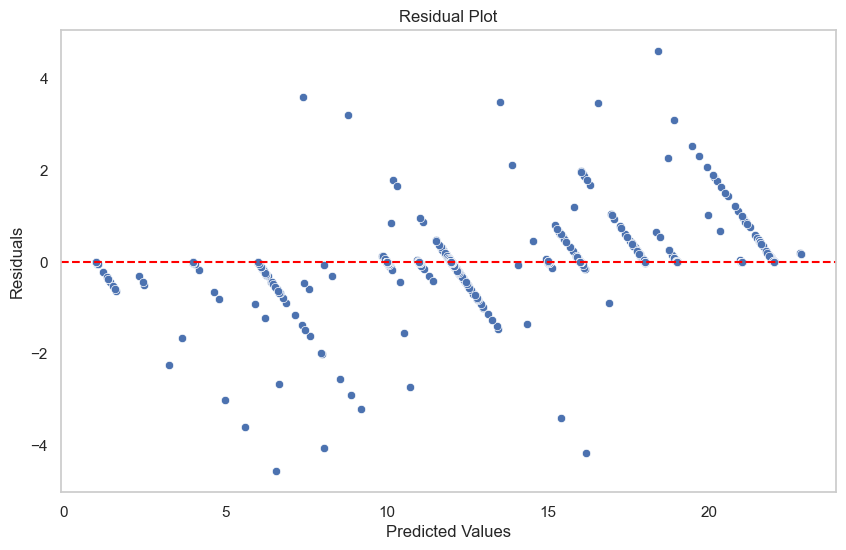

In [51]:
# 3. Residual Plot
residuals = y_val - y_val_pred_expanded
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val_pred_expanded, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

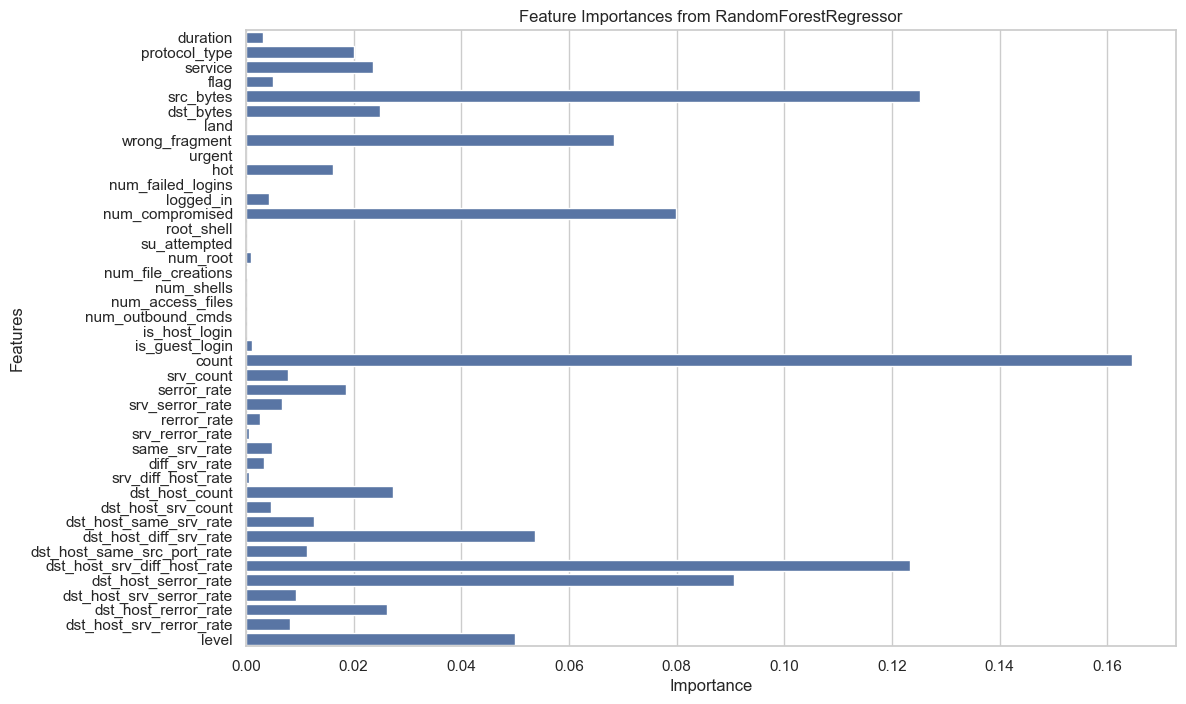

In [52]:
# 4. Feature Importance Plot
importances = best_model_expanded.feature_importances_
feature_names = X_train.columns  # Assuming X_train is a DataFrame

plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importances from RandomForestRegressor')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

### Lets get test data in action

In [55]:
# Load the test dataset
test_df = pd.read_csv("data/nsl-kdd/KDDTest+.txt", low_memory=False)

# Define the features (X_test) and target variable (y_test)
X_test = test_df.drop(columns=['attack']) 
y_test = test_df['attack']  
# Make predictions on the test set
y_test_pred = best_model_expanded.predict(X_test)

# Calculate RMSE if ground truth is available
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Test RMSE: {test_rmse}")

# Output the predictions
print("Predictions on Test Dataset:")
print(y_test_pred)




Test RMSE: 7.721796229697426
Predictions on Test Dataset:
[10.04705882 12.          9.13598039 ...  1.34705882 12.
 13.7765051 ]


   Actual  Predicted
0      15  10.047059
1      17  12.000000
2      25   9.135980
3      12  11.211957
4      17  12.000000
       Actual  Predicted  Difference
0          15  10.047059    4.952941
1          17  12.000000    5.000000
2          25   9.135980   15.864020
3          12  11.211957    0.788043
4          17  12.000000    5.000000
...       ...        ...         ...
22538      17  12.000000    5.000000
22539      17  12.000000    5.000000
22540       2   1.347059    0.652941
22541      17  12.000000    5.000000
22542      12  13.776505   -1.776505

[22543 rows x 3 columns]


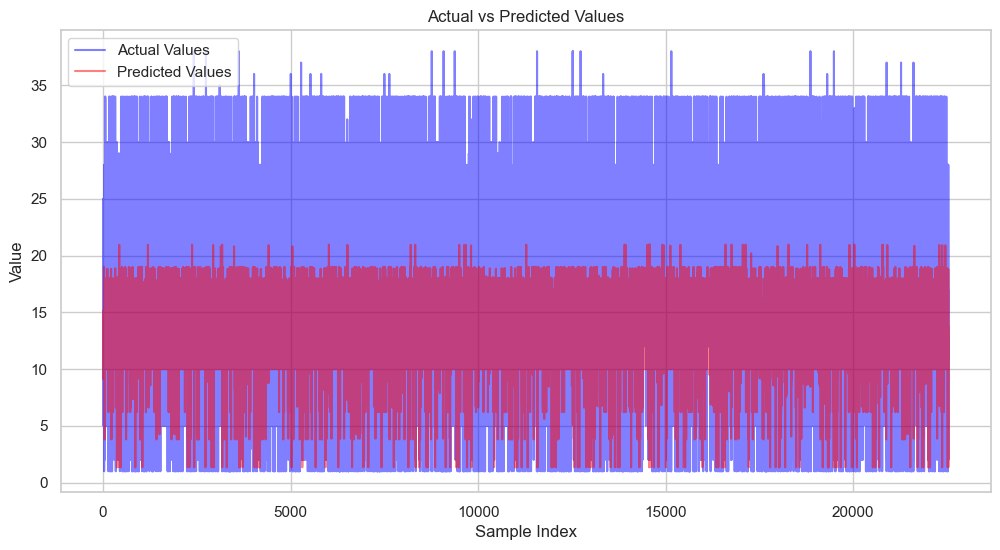

In [56]:
import pandas as pd

# Assuming you've already defined y_test and y_test_pred
# Create a DataFrame to hold the actual and predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})

# Display the first few rows of the comparison DataFrame
print(comparison_df.head())

# Optionally, calculate the difference
comparison_df['Difference'] = comparison_df['Actual'] - comparison_df['Predicted']

# Display the comparison DataFrame
print(comparison_df)

# Optionally, save the comparison to a CSV file
comparison_df.to_csv('comparison_predictions.csv', index=False)

# Plot the comparison (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Actual'].reset_index(drop=True), label='Actual Values', color='blue', alpha=0.5)
plt.plot(comparison_df['Predicted'].reset_index(drop=True), label='Predicted Values', color='red', alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()


### Try to do experiment with other algorithms to get lower rmse for test data